In [1]:
!pip install bs4
!pip install pandas
!pip install matplotlib


In [65]:
from bs4 import BeautifulSoup
import requests
import pandas as pd
import matplotlib.pyplot as plt
import re

In [4]:
densityLink = 'https://visaguide.world/asia/'
gdpLink = 'https://en.wikipedia.org/wiki/List_of_Asian_countries_by_GDP'

In [5]:
densityResponse = requests.get(densityLink)
densityResponse

<Response [200]>

In [6]:
densitySoup = BeautifulSoup(densityResponse.text,'html.parser')
densitySoup

<!DOCTYPE html>

<html lang="en-US">
<head>
<meta charset="utf-8"/>
<meta content="width=device-width, initial-scale=1" name="viewport"/>
<link href="https://gmpg.org/xfn/11" rel="profile"/>
<meta content="index, follow, max-image-preview:large, max-snippet:-1, max-video-preview:-1" name="robots">
<style>img:is([sizes="auto" i], [sizes^="auto," i]) { contain-intrinsic-size: 3000px 1500px }</style>
<!-- This site is optimized with the Yoast SEO plugin v24.2 - https://yoast.com/wordpress/plugins/seo/ -->
<title>List of Countries in Asia - VisaGuide.World</title><link as="image" data-rocket-preload="" fetchpriority="high" href="https://visaguide.world/wp-content/uploads/2023/01/Visa-Guide-World.svg" rel="preload"/><link as="style" data-rocket-preload="" href="https://fonts.googleapis.com/css?family=Roboto%3A300%2C400%2C500&amp;display=swap" rel="preload"><link href="https://fonts.googleapis.com/css?family=Roboto%3A300%2C400%2C500&amp;display=swap" media="print" onload="this.media='all'" r

In [7]:
densityTables = densitySoup.find_all('table')
len(densityTables)

3

In [8]:
densityHeaders = densityTables[1].find_all('th')
densityHeaders

[<th>Country</th>,
 <th>Capital</th>,
 <th>Area km2</th>,
 <th>Population (2021)</th>]

In [9]:
densityRows = densityTables[1].find_all('td')
densityRows

[<td>Afghanistan</td>,
 <td>Kabul</td>,
 <td>652,864</td>,
 <td>39,835,428</td>,
 <td>Armenia</td>,
 <td>Yerevan</td>,
 <td>29,743</td>,
 <td>2,968,127</td>,
 <td>Azerbaijan</td>,
 <td>Baku</td>,
 <td>86,600</td>,
 <td>10,223,342</td>,
 <td>Bahrain</td>,
 <td>Manama</td>,
 <td>760</td>,
 <td>1,748,296</td>,
 <td>Bangladesh</td>,
 <td>Dhaka</td>,
 <td>147,570</td>,
 <td>166,303,498</td>,
 <td>Bhutan</td>,
 <td>Thimphu</td>,
 <td>38,394</td>,
 <td>779,898</td>,
 <td>Brunei</td>,
 <td>Bandar Seri Begawan</td>,
 <td>5,765</td>,
 <td>441,532</td>,
 <td>Cambodia</td>,
 <td>Phnom Penh</td>,
 <td>181,035</td>,
 <td>16,946,438</td>,
 <td>China (PRC)</td>,
 <td>Beijing</td>,
 <td>9,596,961</td>,
 <td>1,444,216,107</td>,
 <td>East Timor</td>,
 <td>Dili</td>,
 <td>14,874</td>,
 <td>1,343,873</td>,
 <td>Georgia</td>,
 <td>Tbilisi</td>,
 <td>69,700</td>,
 <td>3,979,765</td>,
 <td>Hong Kong</td>,
 <td>City of Victoria</td>,
 <td>2,755</td>,
 <td>7,552,810</td>,
 <td>India</td>,
 <td>New Delhi</td>,
 

In [10]:
densityHeaders = [head.text for head in densityHeaders]
densityHeaders

['Country', 'Capital', 'Area km2', 'Population (2021)']

In [11]:
densityRows = [row.text for row in densityRows]
densityRows

['Afghanistan',
 'Kabul',
 '652,864',
 '39,835,428',
 'Armenia',
 'Yerevan',
 '29,743',
 '2,968,127',
 'Azerbaijan',
 'Baku',
 '86,600',
 '10,223,342',
 'Bahrain',
 'Manama',
 '760',
 '1,748,296',
 'Bangladesh',
 'Dhaka',
 '147,570',
 '166,303,498',
 'Bhutan',
 'Thimphu',
 '38,394',
 '779,898',
 'Brunei',
 'Bandar Seri Begawan',
 '5,765',
 '441,532',
 'Cambodia',
 'Phnom Penh',
 '181,035',
 '16,946,438',
 'China (PRC)',
 'Beijing',
 '9,596,961',
 '1,444,216,107',
 'East Timor',
 'Dili',
 '14,874',
 '1,343,873',
 'Georgia',
 'Tbilisi',
 '69,700',
 '3,979,765',
 'Hong Kong',
 'City of Victoria',
 '2,755',
 '7,552,810',
 'India',
 'New Delhi',
 '3,287,263',
 '1,393,409,038',
 'Indonesia',
 'Jakarta',
 '1,904,569',
 '276,361,783',
 'Iran',
 'Tehran',
 '1,648,195',
 '85,028,759',
 'Iraq',
 'Baghdad',
 '438,317',
 '41,179,350',
 'Israel',
 'Jerusalem (disputed)',
 '20,770',
 '8,789,774',
 'Japan',
 'Tokyo',
 '377,915',
 '126,050,804',
 'Jordan',
 'Amman',
 '89,342',
 '10,269,021',
 'Kazakhst

In [12]:
D={}
start=0
for head in densityHeaders:
  D[head]= [densityRows[i] for i in range(start,len(densityRows),len(densityHeaders))]
  start+=1
for i,j in D.items():
  print(f'{i}:{j}')

Country:['Afghanistan', 'Armenia', 'Azerbaijan', 'Bahrain', 'Bangladesh', 'Bhutan', 'Brunei', 'Cambodia', 'China (PRC)', 'East Timor', 'Georgia', 'Hong Kong', 'India', 'Indonesia', 'Iran', 'Iraq', 'Israel', 'Japan', 'Jordan', 'Kazakhstan', 'Kuwait', 'Kyrgyzstan', 'Laos', 'Lebanon', 'Macau', 'Malaysia', 'Maldives', 'Mongolia', 'Myanmar', 'Nepal', 'North Korea', 'Oman', 'Pakistan', 'Palestine', 'Qatar', 'Russia', 'Saudi Arabia', 'Singapore', 'South Korea', 'Sri Lanka', 'Syria', 'Taiwan', 'Tajikistan', 'Thailand', 'The Philippines', 'Turkey', 'Turkmenistan', 'United Arab Emirates', 'Uzbekistan', 'Vietnam', 'Yemen']
Capital:['Kabul', 'Yerevan', 'Baku', 'Manama', 'Dhaka', 'Thimphu', 'Bandar Seri Begawan', 'Phnom Penh', 'Beijing', 'Dili', 'Tbilisi', 'City of Victoria', 'New Delhi', 'Jakarta', 'Tehran', 'Baghdad', 'Jerusalem (disputed)', 'Tokyo', 'Amman', 'Nur-Sultan', 'Kuwait City', 'Bishkek', 'Vientiane', 'Beirut', 'Macau', 'Kuala Lumpur', 'Malé', 'Ulaanbaatar', 'Naypyidaw', 'Kathmandu', 'P

In [13]:
densityDf = pd.DataFrame(D)
densityDf.index=range(1,len(densityDf)+1)
densityDf

,Country,Capital,Area km2,Population (2021)
1,Afghanistan,Kabul,"652,864","39,835,428"
2,Armenia,Yerevan,"29,743","2,968,127"
3,Azerbaijan,Baku,"86,600","10,223,342"
4,Bahrain,Manama,760,"1,748,296"
5,Bangladesh,Dhaka,"147,570","166,303,498"
6,Bhutan,Thimphu,"38,394","779,898"
7,Brunei,Bandar Seri Begawan,"5,765","441,532"
8,Cambodia,Phnom Penh,"181,035","16,946,438"
9,China (PRC),Beijing,"9,596,961","1,444,216,107"
10,East Timor,Dili,"14,874","1,343,873"


In [14]:

densityDf['Population (2021)']=densityDf['Population (2021)'].str.replace(',','').astype(int)
densityDf

,Country,Capital,Area km2,Population (2021)
1,Afghanistan,Kabul,"652,864",39835428
2,Armenia,Yerevan,"29,743",2968127
3,Azerbaijan,Baku,"86,600",10223342
4,Bahrain,Manama,760,1748296
5,Bangladesh,Dhaka,"147,570",166303498
6,Bhutan,Thimphu,"38,394",779898
7,Brunei,Bandar Seri Begawan,"5,765",441532
8,Cambodia,Phnom Penh,"181,035",16946438
9,China (PRC),Beijing,"9,596,961",1444216107
10,East Timor,Dili,"14,874",1343873


In [15]:
densityDf['Area km2']=densityDf['Area km2'].str.replace(',','').astype(int)
densityDf

,Country,Capital,Area km2,Population (2021)
1,Afghanistan,Kabul,652864,39835428
2,Armenia,Yerevan,29743,2968127
3,Azerbaijan,Baku,86600,10223342
4,Bahrain,Manama,760,1748296
5,Bangladesh,Dhaka,147570,166303498
6,Bhutan,Thimphu,38394,779898
7,Brunei,Bandar Seri Begawan,5765,441532
8,Cambodia,Phnom Penh,181035,16946438
9,China (PRC),Beijing,9596961,1444216107
10,East Timor,Dili,14874,1343873


In [16]:
densityDf['Population Density']= densityDf['Population (2021)']/densityDf['Area km2']
densityDf

,Country,Capital,Area km2,Population (2021),Population Density
1,Afghanistan,Kabul,652864,39835428,61.016426
2,Armenia,Yerevan,29743,2968127,99.792455
3,Azerbaijan,Baku,86600,10223342,118.052448
4,Bahrain,Manama,760,1748296,2300.389474
5,Bangladesh,Dhaka,147570,166303498,1126.946520
6,Bhutan,Thimphu,38394,779898,20.313018
7,Brunei,Bandar Seri Begawan,5765,441532,76.588378
8,Cambodia,Phnom Penh,181035,16946438,93.608628
9,China (PRC),Beijing,9596961,1444216107,150.486816
10,East Timor,Dili,14874,1343873,90.350477


In [17]:
descdensityDf = densityDf.sort_values(by='Population Density',ascending=False)
descdensityDf

,Country,Capital,Area km2,Population (2021),Population Density
38,Singapore,Singapore,697,5896686,8460.094692
25,Macau,Macau,115,658394,5725.165217
12,Hong Kong,City of Victoria,2755,7552810,2741.491833
4,Bahrain,Manama,760,1748296,2300.389474
27,Maldives,Malé,298,543617,1824.218121
5,Bangladesh,Dhaka,147570,166303498,1126.946520
34,Palestine,Ramallah,6220,5222748,839.670096
42,Taiwan,Taipei,36193,23855010,659.105628
24,Lebanon,Beirut,10400,6769146,650.879423
39,South Korea,Seoul,100210,51305186,511.976709


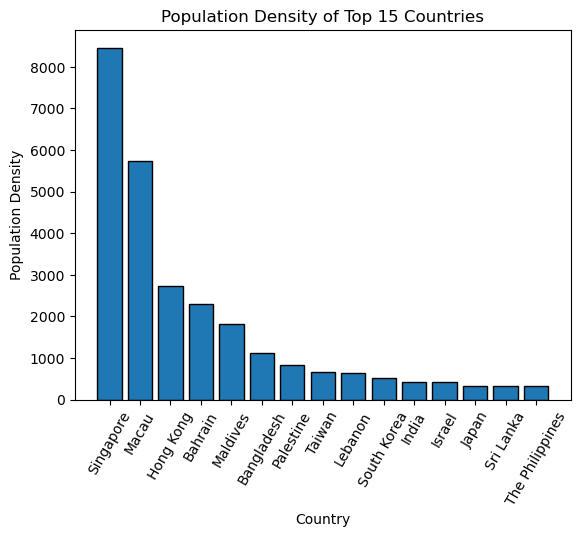

In [18]:
x=descdensityDf['Country'][:15]
y=descdensityDf['Population Density'][:15]
plt.bar(x, y, width=0.8, edgecolor='black')
plt.xticks(rotation=60)
plt.xlabel("Country")
plt.ylabel("Population Density")
plt.title("Population Density of Top 15 Countries")
plt.show()

In [19]:
gdpResponse = requests.get(gdpLink)
gdpResponse

<Response [200]>

In [20]:
gdpSoup= BeautifulSoup(gdpResponse.text,'html.parser')
gdpSoup

<!DOCTYPE html>

<html class="client-nojs vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-clientpref-1 vector-feature-main-menu-pinned-disabled vector-feature-limited-width-clientpref-1 vector-feature-limited-width-content-enabled vector-feature-custom-font-size-clientpref-1 vector-feature-appearance-pinned-clientpref-1 vector-feature-night-mode-enabled skin-theme-clientpref-day vector-sticky-header-enabled vector-toc-available" dir="ltr" lang="en">
<head>
<meta charset="utf-8"/>
<title>List of Asian countries by GDP - Wikipedia</title>
<script>(function(){var className="client-js vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-clientpref-1 vector-feature-main-menu-pinned-disabled vector-feature-limited-width-clientpref-1 vector-feature-limited-width-content-e

In [21]:
gdpTable = gdpSoup.find_all('table')
len(gdpTable)

2

In [22]:
gdpTable[0]

<table class="wikitable">
<tbody><tr>
<th>Region<br/>rank
</th>
<th>Country/Territory
</th>
<th>2024 GDP (nominal) in billions
</th></tr>
<tr>
<td>—
</td>
<td><b><a href="/wiki/Asia" title="Asia">Asia</a></b>
</td>
<td><b>42.72 trillion</b>
</td></tr>
<tr>
<td>1
</td>
<td><span class="flagicon"><span class="mw-image-border" typeof="mw:File"><span><img alt="" class="mw-file-element" data-file-height="600" data-file-width="900" decoding="async" height="15" src="//upload.wikimedia.org/wikipedia/commons/thumb/f/fa/Flag_of_the_People%27s_Republic_of_China.svg/23px-Flag_of_the_People%27s_Republic_of_China.svg.png" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/f/fa/Flag_of_the_People%27s_Republic_of_China.svg/35px-Flag_of_the_People%27s_Republic_of_China.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/f/fa/Flag_of_the_People%27s_Republic_of_China.svg/45px-Flag_of_the_People%27s_Republic_of_China.svg.png 2x" width="23"/></span></span> </span><a href="/wiki/China" title="C

In [23]:
gdpHeaders = gdpTable[0].find_all('th')
gdpHeaders

[<th>Region<br/>rank
 </th>,
 <th>Country/Territory
 </th>,
 <th>2024 GDP (nominal) in billions
 </th>]

In [24]:
gdpRows = gdpTable[0].find_all('td')
gdpRows

[<td>—
 </td>,
 <td><b><a href="/wiki/Asia" title="Asia">Asia</a></b>
 </td>,
 <td><b>42.72 trillion</b>
 </td>,
 <td>1
 </td>,
 <td><span class="flagicon"><span class="mw-image-border" typeof="mw:File"><span><img alt="" class="mw-file-element" data-file-height="600" data-file-width="900" decoding="async" height="15" src="//upload.wikimedia.org/wikipedia/commons/thumb/f/fa/Flag_of_the_People%27s_Republic_of_China.svg/23px-Flag_of_the_People%27s_Republic_of_China.svg.png" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/f/fa/Flag_of_the_People%27s_Republic_of_China.svg/35px-Flag_of_the_People%27s_Republic_of_China.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/f/fa/Flag_of_the_People%27s_Republic_of_China.svg/45px-Flag_of_the_People%27s_Republic_of_China.svg.png 2x" width="23"/></span></span> </span><a href="/wiki/China" title="China">China</a>
 </td>,
 <td>18.53  trillion<sup class="reference" id="cite_ref-2"><a href="#cite_note-2"><span class="cite-bracket">[</span

In [25]:
gdpHeaders = [head.text.strip() for head in gdpHeaders]
gdpHeaders

['Regionrank', 'Country/Territory', '2024 GDP (nominal) in billions']

In [26]:
gdpRows = [row.text.strip() for row in gdpRows]
gdpRows

['—',
 'Asia',
 '42.72 trillion',
 '1',
 'China',
 '18.53  trillion[2]',
 '2',
 'Japan',
 '4.07  trillion[3]',
 '3',
 'India',
 '3.88  trillion[4]',
 '4',
 'Russia',
 '2.0 trillion',
 '5',
 'South Korea',
 '1.76 trillion',
 '6',
 'Indonesia',
 '1.47  trillion',
 '7',
 'Turkey',
 '1.3 trillion',
 '8',
 'Saudi Arabia',
 '1.11  trillion',
 '9',
 'Taiwan',
 '803.0 billion',
 '10',
 'Thailand',
 '548.9 billion',
 '11',
 'Israel',
 '530.6 billion',
 '12',
 'United Arab Emirates',
 '527.8 billion',
 '13',
 'Singapore',
 '525.2 billion',
 '14',
 'Philippines',
 '471.5 billion',
 '15',
 'Vietnam',
 '465.8 billion',
 '16',
 'Bangladesh',
 '451.16 billion',
 '17',
 'Malaysia',
 '445.5 billion',
 '18',
 'Iran',
 '434.8 billion',
 '19',
 'Hong Kong\n(SAR)',
 '401.5 billion',
 '20',
 'Pakistan',
 '374.6 billion',
 '21',
 'Kazakhstan',
 '292.8 billion',
 '22',
 'Iraq',
 '265.6 billion',
 '23',
 'Qatar',
 '223.3 billion',
 '24',
 'Kuwait',
 '184.8 billion',
 '25',
 'Oman',
 '114.7 billion',
 '26',
 'U

In [27]:
finalGdpRows = gdpRows[3:]
finalGdpRows

['1',
 'China',
 '18.53  trillion[2]',
 '2',
 'Japan',
 '4.07  trillion[3]',
 '3',
 'India',
 '3.88  trillion[4]',
 '4',
 'Russia',
 '2.0 trillion',
 '5',
 'South Korea',
 '1.76 trillion',
 '6',
 'Indonesia',
 '1.47  trillion',
 '7',
 'Turkey',
 '1.3 trillion',
 '8',
 'Saudi Arabia',
 '1.11  trillion',
 '9',
 'Taiwan',
 '803.0 billion',
 '10',
 'Thailand',
 '548.9 billion',
 '11',
 'Israel',
 '530.6 billion',
 '12',
 'United Arab Emirates',
 '527.8 billion',
 '13',
 'Singapore',
 '525.2 billion',
 '14',
 'Philippines',
 '471.5 billion',
 '15',
 'Vietnam',
 '465.8 billion',
 '16',
 'Bangladesh',
 '451.16 billion',
 '17',
 'Malaysia',
 '445.5 billion',
 '18',
 'Iran',
 '434.8 billion',
 '19',
 'Hong Kong\n(SAR)',
 '401.5 billion',
 '20',
 'Pakistan',
 '374.6 billion',
 '21',
 'Kazakhstan',
 '292.8 billion',
 '22',
 'Iraq',
 '265.6 billion',
 '23',
 'Qatar',
 '223.3 billion',
 '24',
 'Kuwait',
 '184.8 billion',
 '25',
 'Oman',
 '114.7 billion',
 '26',
 'Uzbekistan',
 '101.8 billion',
 '27

In [28]:
gdpD={}
st=0
for i in gdpHeaders:
  gdpD[i] = [finalGdpRows[i] for i in range(st,len(finalGdpRows),len(gdpHeaders))]
  st+=1

for i,j in gdpD.items():
  print(f'{i}:{j}')

Regionrank:['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '40', '41', '42', '43', '44', '45', '46', '47', '48', '49', '50', '51', '52']
Country/Territory:['China', 'Japan', 'India', 'Russia', 'South Korea', 'Indonesia', 'Turkey', 'Saudi Arabia', 'Taiwan', 'Thailand', 'Israel', 'United Arab Emirates', 'Singapore', 'Philippines', 'Vietnam', 'Bangladesh', 'Malaysia', 'Iran', 'Hong Kong\n(SAR)', 'Pakistan', 'Kazakhstan', 'Iraq', 'Qatar', 'Kuwait', 'Oman', 'Uzbekistan', 'Turkmenistan', 'Sri Lanka', 'Azerbaijan', 'Myanmar', 'Macau\n(SAR)', 'Jordan', 'Bahrain', 'Nepal', 'Cambodia', 'Lebanon', 'Cyprus', 'Georgia', 'Armenia', 'North Korea', 'Syria', 'Mongolia', 'Palestine', 'Laos', 'Afghanistan', 'Yemen', 'Brunei', 'Kyrgyzstan', 'Tajikistan', 'Maldives', 'Bhutan', 'Timor-Leste']
2024 GDP (nominal) in billions:['18.53  

In [29]:
gdpDf=pd.DataFrame(gdpD)
gdpDf

,Regionrank,Country/Territory,2024 GDP (nominal) in billions
0,1,China,18.53 trillion[2]
1,2,Japan,4.07 trillion[3]
2,3,India,3.88 trillion[4]
3,4,Russia,2.0 trillion
4,5,South Korea,1.76 trillion
5,6,Indonesia,1.47 trillion
6,7,Turkey,1.3 trillion
7,8,Saudi Arabia,1.11 trillion
8,9,Taiwan,803.0 billion
9,10,Thailand,548.9 billion


In [30]:
# gdpDf.to_csv('gdpCsv.csv')